## Table of contents

* [Data Gathering](#data-gathering)
* [Data Assessment](#data-assessment)
* [Data Cleaning](#data-cleaning)
* [Data Exploring](#data-exploring)
* [Data Evaluation](#data-evaluation)

## Imports

* Pandas - Dealing with data
* Numpy - C based functions resulting in faster times
* Matplotlib.pyplot - Dealing with visualization
* Seaborn - Dealing with visualization
* Tweepy - Allowing us to interact with twitter's API
* Tiwtter_keys - API keys

In [1]:
import pandas as pd
from pandas.io.json import json_normalize

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import tweepy

import requests

# API Key
# import twitter_keys

# consumer_key = twitter_keys.consumer_key
# consumer_secret = twitter_keys.consumer_secret
# access_token = twitter_keys.access_token
# access_secret = twitter_keys.access_secret

%matplotlib inline

# dogs = pd.read_csv('./datasets/twitter-archive-enhanced.csv')
# predictions = pd.read_csv('./datasets/image-predictions.tsv', delim_whitespace=True)
# tweets = pd.read_csv('./datasets/tweet_df.csv')

# dogs_clean = dogs.copy()
# predictions_clean = predictions.copy()
# tweets_clean = tweets.copy()

In [2]:
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

<div id='data-gathering'></div>

## Data Gathering

* Given by Udacity

In [3]:
dogs = pd.read_csv('./datasets/twitter-archive-enhanced.csv')
dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


* Given by Udacity

In [4]:
# Udacity server url
udacity_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
predictions = pd.read_csv(udacity_url, delim_whitespace=True)
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Itterate through tweet_id to grab additional information

In [5]:
# retweeted
# retweet_count
# favorite_count
# is_quote_status
# favorited

# new_df = pd.DataFrame(data=[['one', 'two', 'three', 'four', 'five', 'size']], columns=['tweet_id', 'retweeted', 'retweet_count', 'favorite_count', 'is_quote_status', 'favorited'])
# temp = []

In [6]:
# # tweet_ids = list(df['tweet_id'])
# columns = ['tweet_id', 'retweeted', 'retweet_count', 'favorite_count', 'is_quote_status', 'favorited']
# # temp = []
# for i in tweet_ids[19:]:
#     try:
#         response = api.get_status(i, tweet_mode='extended')
#         results = response._json
#     except:
#         continue
    
#     # retweeted
#     try:
#         retweeted = results['retweeted']
#     except:
#         retweeted = np.nan
    
#     # retweet_count
#     try:
#         retweet_count = results['retweet_count']
#     except:
#         retweet_count = np.nan
    
#     # favorite_count
#     try:
#         favorite_count = results['favorite_count']
#     except:
#         favorite_count = np.nan
    
#     # is_quote_status
#     try:
#         is_quote_status = results['is_quote_status']
#     except:
#         is_quote_status = np.nan
    
#     # favorited
#     try:
#         favorited = results['favorited']
#     except:
#         favorited = np.nan
        
#     temp.append([i, retweeted, retweet_count, favorite_count, is_quote_status, favorited])
    
#     temp_df = pd.DataFrame(temp, columns=columns)
#     temp_df.to_csv('tweet_df.csv', index=False)
    
#     time.sleep(2)

<div id='data-assessment'>

## Data Assessment

In [7]:
dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
dogs['source'].values

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       ...,
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

In [9]:
dogs.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
dogs.loc[dogs['name'] == 'None'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None


In [11]:
dogs[dogs['retweeted_status_timestamp'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [12]:
dogs.loc[dogs['expanded_urls'].map(lambda x: len(str(x).split('https://twitter.com')) > 2), 'expanded_urls'].values[0]




'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'

In [13]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweets = pd.read_csv('./datasets/tweet_df.csv')
tweets.head()

,tweet_id,retweeted,retweet_count,favorite_count,is_quote_status,favorited
0,892420643555336193,False,8208,37653,False,False
1,892177421306343426,False,6072,32350,False,False
2,891815181378084864,False,4014,24372,False,False
3,891689557279858688,False,8367,40965,False,False
4,891327558926688256,False,9063,39173,False,False


In [17]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 6 columns):
tweet_id           2339 non-null int64
retweeted          2339 non-null bool
retweet_count      2339 non-null int64
favorite_count     2339 non-null int64
is_quote_status    2339 non-null bool
favorited          2339 non-null bool
dtypes: bool(3), int64(3)
memory usage: 61.8 KB


In [18]:
dogs['text'].str.contains('@RT').sum()

0

### Quality

#### dogs table

* rating numerator and denominator should be floats.
* tweet_id column should be object datatype
* timestamp is not a datetime type
* Source is unnecessary
* Nulls replaced with something more appropiate, maybe 0
* retweeted_status_timestamp is not a datetime type
* Wrong dtypes for doggo, floofer, pupper, puppo
* Wrong names
* doggo, floofer, pupper, puppo needs only 1 column as dog_stage.
* if not a pupper, puppo then a floofer
* recorded the rating wrong in some cells.
* Missing links for pictures.
* Duplicated links within link to pictures.


#### predictions table

* tweet_id column should be object datatype
* p1, p2, p3 wrong dtypes

#### tweets table

* tweet_id column should be object datatype

### Tidiness

####  Predictions
* Duplicated picture links for tables 'jpg_url' and 'exanded_url'
* Drop img_num

#### Dogs

* Some retweets need to be dropped
* Unnecessary columns for 'in_reply_to_status_id', 'in_reply_to_user_id,' 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status_id,'
* tweets needs to be joined with dogs
* Gofundme websites in links for pictures need to be deleted.
* Many rows that are not about dogs need to be deleted

#### Tweets

* Drop the same tweet ids from dogs to combine later

<div id='data-cleaning'></div>

## Data Cleaning

In [19]:
dogs_clean = dogs.copy()
predictions_clean = predictions.copy()
tweets_clean = tweets.copy()

### Some retweets need to be dropped

#### Define

First collect all the twitter ids into one list (for later use), then grab the index and drop inplace.

#### Code

In [20]:
tweet_ids_drop = dogs_clean.loc[dogs_clean['retweeted_status_id'].notna(), 'tweet_id'].values

drop_index = dogs_clean[dogs_clean['tweet_id'].map(lambda x: x in tweet_ids_drop)].index

dogs_clean.drop(drop_index, inplace=True)

#### Test

In [21]:
dogs_clean['retweeted_status_id'].notna().sum()

0

### Drop the same tweet ids from dogs to combine later

#### Define

Using the tweet id's from earlier, grab the index from tweets and drop inplace.

#### Code

In [22]:
index_drop = tweets_clean[tweets_clean['tweet_id'].map(lambda x: x in tweet_ids_drop)].index

In [23]:
tweets_clean.drop(index_drop, inplace=True)

In [24]:
index_drop = predictions_clean[predictions_clean['tweet_id'].map(lambda x: x in tweet_ids_drop)].index

In [25]:
predictions_clean.drop(index_drop, inplace=True)

#### Test

In [26]:
tweets_clean['tweet_id'].map(lambda x: x in tweet_ids_drop).sum()

0

In [27]:
predictions_clean['tweet_id'].map(lambda x: x in tweet_ids_drop).sum()

0

### rating numerator and denominator should be floats.

#### Define

Change with as type and set it to itself.

#### Code

In [28]:
dogs_clean['rating_numerator'] = dogs_clean['rating_numerator'].astype(float)
dogs_clean['rating_denominator'] = dogs_clean['rating_denominator'].astype(float)

#### Test

In [29]:
print(dogs_clean['rating_numerator'].dtype)
dogs_clean['rating_denominator'].dtype

float64


dtype('float64')

### tweet_id column should be object datatype

#### Define

We will just change the comlumn with astype(object) and set it to itself.

#### Code

In [30]:
dogs_clean['tweet_id'] = dogs_clean['tweet_id'].astype(object)
predictions_clean['tweet_id'] = predictions_clean.astype(object)
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(object)

#### Test

In [31]:
dogs_clean['tweet_id'].dtype

dtype('O')

In [32]:
predictions_clean['tweet_id'].dtype

dtype('O')

In [33]:
tweets_clean['tweet_id'].dtype

dtype('O')

### timestamp is not a datetime type

#### Define

Re-declare timestamp column as original but as type datetime.

#### Code

In [34]:
dogs_clean['timestamp'] = pd.to_datetime(dogs_clean['timestamp'])

#### Test

In [35]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[n

### Source is unnecessary

#### Define

Drop column, 'source.'

#### Code

In [36]:
dogs_clean.drop(columns='source', inplace=True)

#### Test

In [37]:
'source' in dogs_clean.columns

False

### Nulls replaced with something more appropiate, maybe 0

#### Define

Simply fill nulls as 0.

#### Code

In [38]:
dogs_clean.fillna(0, inplace=True)

#### Test

In [39]:
dogs_clean.isna().sum().sum()

0

### retweeted_status_timestamp is not a datetime type

#### Define

Declare anew as itself turned into datetime.

#### Code

In [40]:
dogs_clean['retweeted_status_timestamp'] = pd.to_datetime(dogs_clean['retweeted_status_timestamp'])

#### Test

In [41]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null float64
in_reply_to_user_id           2175 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
text                          2175 non-null object
retweeted_status_id           2175 non-null float64
retweeted_status_user_id      2175 non-null float64
retweeted_status_timestamp    2175 non-null datetime64[ns]
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), 

### Wrong names

#### Define

Can't actually fix this.

#### Code

In [42]:
import re

In [43]:
def lower_first_letter(x):
    return x[0] == x[0].lower()

In [44]:
mask = dogs_clean[dogs_clean['name'].map(lower_first_letter)]

In [45]:
df_fix = mask[dogs_clean[dogs_clean['name'].map(lower_first_letter)]['text'].str.contains('name').values]

In [46]:
def throwaway(text):
    try:
        regex = r'name is ([a-zA-Z]+)'
        name = re.search(regex, text).group(1)
    except:
        regex = r'named ([a-zA-Z]+)'
        name = re.search(regex, text).group(1)
        
    return name

In [47]:
mask = df_fix.index

In [48]:
dogs_clean.loc[mask, 'name'] = dogs_clean.loc[mask, 'text'].map(throwaway)

#### Test

In [49]:
dogs_clean[dogs_clean['name'].map(lower_first_letter)]['text'].values[:5]

array(["I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba",
       'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
       "We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9",
       "Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",
       "There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7"],
      dtype=object)

In [50]:
dogs_clean.loc[mask, 'name']

852          Zoey
1853        Wylie
1955          Kip
2034        Jacob
2066        Rufus
2116        Spork
2125     Cherokee
2128        Hemry
2146      Alphred
2161      Alfredo
2191        Leroi
2204        Berta
2218         Chuk
2235      Alfonso
2249       Cheryl
2255      Jessiga
2264        Klint
2273         Kohl
2287        Daryl
2304         Pepe
2311    Octaviath
2314         Johm
Name: name, dtype: object

### Rows that have nothing to do with dogs need to be dropped

#### Define

Find where the name is None, the numberator divided by denominator is less than 1, and it's None in all of the dog_stage columns.

#### Code

In [51]:
f = dogs_clean['name'] == 'None'

e = dogs_clean['rating_numerator'] / dogs_clean['rating_denominator'] < 1

a = dogs_clean['floofer'] == 'None'
b = dogs_clean['pupper'] == 'None'
c = dogs_clean['puppo'] == 'None'
d = dogs_clean['doggo'] == 'None'
index = dogs_clean.loc[a & b & c & d & e & f].index

dogs_clean.drop(index, inplace=True)

#### Test

In [52]:
dogs_clean.loc[a & b & c & d & e & f]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### doggo, floofer, pupper, puppo needs only one column

#### Define

Loop through the columns and take the name out of them and put them in a new column called dog_stage.

#### Code

In [53]:
def new_dog_type(doggo, floofer, pupper, puppo):
    doggo = doggo.replace('None', '')
    floofer = floofer.replace('None', '')
    pupper = pupper.replace('None', '')
    puppo = puppo.replace('None', '')
    
    dog_type = doggo + floofer + pupper + puppo
    
    if dog_type == '':
        return 'floofer'
    return dog_type

In [54]:
dogs_clean['dog_stage'] = dogs_clean.apply(lambda x: new_dog_type(doggo = x['doggo'],
                                                                floofer = x['floofer'],
                                                                pupper = x['pupper'],
                                                                puppo = x['puppo']),
                                                                axis = 1)

In [55]:
def seperate_dog_stage(x):
    if x not in ['doggo', 'floofer', 'pupper', 'puppo']:
        first_half = x[:5]
        second_half = x[5:]
        return first_half + ', ' + second_half
    
    return x

In [56]:
dogs_clean['dog_stage'] = dogs_clean['dog_stage'].map(seperate_dog_stage)

In [57]:
dogs_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [58]:
dogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,floofer
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,floofer
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,floofer
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,floofer
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,floofer


In [59]:
dogs_clean.loc[dogs_clean['dog_stage'].map(lambda x: x not in ['doggo', 'floofer', 'pupper', 'puppo']), 'dog_stage'].head()

191      doggo, puppo
200    doggo, floofer
460     doggo, pupper
531     doggo, pupper
565     doggo, pupper
Name: dog_stage, dtype: object

### Wrong dtypes for doggo, floofer, pupper, puppo

#### Define

Change the columns with astype to category.

#### Code

In [60]:
dogs_clean['dog_stage'] = dogs_clean['dog_stage'].astype('category')

#### Test

In [61]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2354
Data columns (total 13 columns):
tweet_id                      2044 non-null int64
in_reply_to_status_id         2044 non-null float64
in_reply_to_user_id           2044 non-null float64
timestamp                     2044 non-null datetime64[ns, UTC]
text                          2044 non-null object
retweeted_status_id           2044 non-null float64
retweeted_status_user_id      2044 non-null float64
retweeted_status_timestamp    2044 non-null datetime64[ns]
expanded_urls                 2044 non-null object
rating_numerator              2044 non-null float64
rating_denominator            2044 non-null float64
name                          2044 non-null object
dog_stage                     2044 non-null category
dtypes: category(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 210.0+ KB


### if not a pupper, puppo then a floofer because floofer is the basic of all dogs apparently

#### Define

Done above

#### Code

#### Test

### p1, p2, p3 wrong dtypes

#### Define

Simple declare anew as itself with type as category.

#### Code

In [62]:
predictions_clean[['p1', 'p2', 'p3']] = predictions_clean[['p1', 'p2', 'p3']].astype('category')

#### Test

In [63]:
predictions_clean[['p1', 'p2', 'p3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 3 columns):
p1    1994 non-null category
p2    1994 non-null category
p3    1994 non-null category
dtypes: category(3)
memory usage: 86.5 KB


### Drop jpg urls

#### Define
Simply drop the columns with inplace set to true.

#### Code

In [64]:
predictions_clean.drop(columns='jpg_url', inplace=True)

In [65]:
predictions_clean.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Test

## Drop img_num column

#### Define

Drop with inplace.

#### Code

In [66]:
predictions_clean.drop(columns='img_num', inplace=True)

#### Test

In [67]:
predictions_clean.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Unnecessary columns for 'in_reply_to_status_id', 'in_reply_to_user_id,' 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status_id,'

#### Define

After review, just going to drop them.

#### Code

In [68]:
dogs_clean.drop(columns=['in_reply_to_status_id',
                         'in_reply_to_user_id',
                         'retweeted_status_user_id',
                         'retweeted_status_timestamp',
                         'retweeted_status_id'],
                inplace=True)

#### Test

In [69]:
dogs_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,floofer
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,floofer
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,floofer
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,floofer
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,floofer


### Move 'jpg_urls' in place of 'extended_urls'

#### Define

Ended up just dropping jpg_urls.

#### Code

#### Test

### tweets needs to be joined with dogs

#### Define

Will merge on tweets_id.

#### Code

In [70]:
dogs_tweets_clean = dogs_clean.merge(tweets_clean, on='tweet_id')

#### Test

In [71]:
dogs_tweets_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweeted,retweet_count,favorite_count,is_quote_status,favorited
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,floofer,False,8208,37653,False,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,floofer,False,6072,32350,False,False
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,floofer,False,4014,24372,False,False
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,floofer,False,8367,40965,False,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,floofer,False,9063,39173,False,False


recorded the rating wrong in some cells.
Missing links for pictures.

### Recorded the rating wrong in some cells Bella specifically

#### Define

Grab Bella's tweet id and switch the numerator to 13.5.

#### Code

#### Bella 883482846933004288

In [72]:
dogs_clean.loc[dogs_clean['tweet_id'] == 883482846933004288, 'rating_numerator'] = 13.5

#### Test

In [73]:
dogs_clean.loc[dogs_clean['tweet_id'] == 883482846933004288]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,floofer


### Missing links for pictures

#### Define

After some effort, not actually able to get the missing links for pictures.

#### Code

#### Test

### Duplicated links within cells

#### Define

First need to create a mask in order to isolate the duplicated links. Next create a function that will split them and compare. Lastly, using the mask, set those into the clean dataframe.

#### Code

In [74]:
mask = dogs_clean['expanded_urls'].map(lambda x: str(x).count('http') >= 2)

In [75]:
def delete_duplicated_link(url):
    """
    Splits url into two parts allowing it to be checked for equality.
    If they are not equal; return the original as to not lose data.
    
    Parameters
    ----------
    url : string
    
    Returns
    -------
    url | a | b : string
        Depends on if they are same, not a url, or twitter.
        
    """
    try:
        a, b = url.split(',')[:2]
    except:
        return url
    
    if a == b: return a
    
    return (b if 'twitter' in b else a)

In [76]:
test = dogs_clean[mask]['expanded_urls'].map(delete_duplicated_link)

In [77]:
dogs_clean.loc[mask, 'expanded_urls'] = test

#### Test

In [78]:
(dogs_clean['expanded_urls'].map(lambda x: str(x).count('http') >= 2)).sum()

0

### Gofundme Links needs to be deleted

#### Define

Already done above.

#### Code

#### Test

In [79]:
(dogs_clean['expanded_urls'].map(lambda x: 'gofund' in str(x))).sum()

0

### Combine all DATAFRAMES

#### Define

#### Code

In [80]:
combined_df = tweets_clean.merge(dogs_clean, on='tweet_id').merge(predictions_clean, on='tweet_id')

#### Test

## Saving Clean Datasets

In [81]:
combined_df.to_csv('twitter_archive_master.csv', index=False)

In [82]:
# If you need to import them
combined_df = pd.read_csv('twitter_archive_master.csv')

<div id='data-exploring'></div>

## Data Exploring

In [83]:
combined_df['favorited'].sum()

0

* It wiould seem that none of these dogs were favorited...

In [84]:
combined_df['favorite_count'].sum()

16886692

* Then looking at the favorite count, we can see that over 16 million people favorited it! Not sure on the difference between favorited and favorite count.

In [85]:
combined_df['retweet_count'].sum()

5097728

* These tweets in total were retweeted over 5 million times!

In [86]:
combined_df['retweeted'].sum()

0

* We were trying to avoid grabbing any tweets that were retweeted and it shows that we were successful.

* It also seems a lot of people will send in a picture of their pet blending in with the rug, which people do not seem to appreciate for some reason. Or pictures that are not even of dogs.

<div id='data-evaluation'></div>

## Data Evaluation

In [87]:
combined_df

,tweet_id,retweeted,retweet_count,favorite_count,is_quote_status,favorited,timestamp,text,expanded_urls,rating_numerator,...,dog_stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,False,8208,37653,False,False,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,...,floofer,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,False,6072,32350,False,False,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,...,floofer,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,False,4014,24372,False,False,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,...,floofer,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,False,8367,40965,False,False,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,...,floofer,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,False,9063,39173,False,False,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,...,floofer,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,False,3009,19699,False,False,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,...,floofer,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,False,1988,11520,False,False,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13.0,...,floofer,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,False,18236,63513,False,False,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,...,floofer,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,False,4129,27085,False,False,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,...,floofer,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,False,7128,31041,False,False,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,...,doggo,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


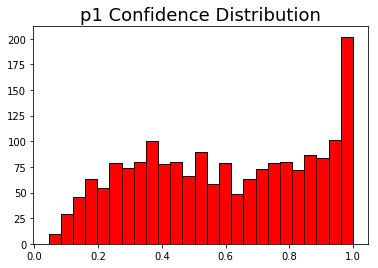

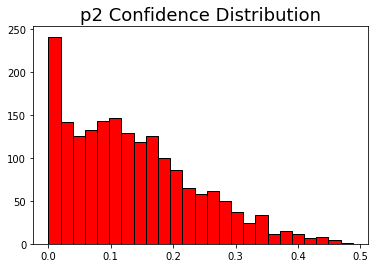

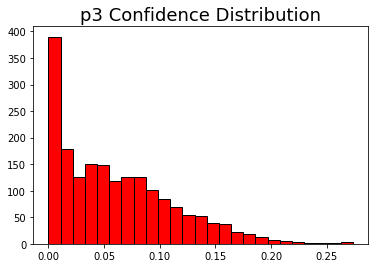

In [88]:
for i in range(1, 4):
    x = combined_df[f'p{i}_conf']

    # Plotting configuration
    plt.figure()
    plt.hist(x,
             color='red',
             bins=25,
             edgecolor='black');
    plt.title(f'p{i} Confidence Distribution', size=18);